In [483]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [484]:
filename = 'courseRecSys.xlsx'

In [485]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [486]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    #replacing nan with mean of users
    # df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
    # df=df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    # df = df.drop(["avg"],axis =1)
    #replacing nan with mean of courses
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [487]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


change 0.5 to average of ratings of that user

In [488]:
df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [489]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [490]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [491]:
def visualize(point):
    wcss = []  #Within Cluster Sum of Squares
    for number_of_clusters in range(1, 15): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(df[core_courses]) 
        wcss.append(kmeans.inertia_)
    ks = np.arange(1,15,1)
    plt.plot(ks, wcss)
    plt.axvline(point, linestyle='--', color='r')
    return wcss

[82.1122601552986,
 63.240786484853075,
 51.758327711871004,
 44.96053632709338,
 39.89398687872323,
 36.144823683120876,
 33.398702023260036,
 30.5695359693512,
 28.1421428563879,
 25.495720837938933,
 24.30352192499446,
 22.250775245363176,
 21.265056428481255,
 19.7185773653146]

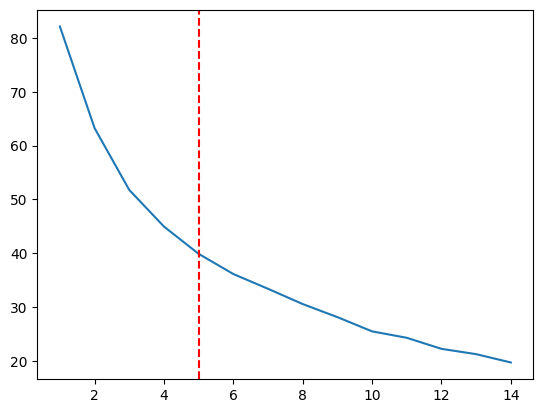

In [492]:
visualize(5)

In [493]:
k = 10
kmeans = KMeans(n_clusters = k, random_state = 42)
clustered_matrix = kmeans.fit_predict(df[core_courses]) 


In [494]:
# kmeans.cluster_centers_

In [495]:
def get_clustered_df(df,num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    print(clustered_matrix.shape)
    clustered_df =[]
    arr = df.to_numpy()
    for i in range(k):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean)
    return clustered_df

In [496]:
clustered_df = get_clustered_df(df,10)

(162,)


In [497]:
df = pd.DataFrame(clustered_df, columns = courses)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.642857,0.042857,0.914286,0.021429,0.914286,0.971429,0.957143,0.800000,0.510377,0.629071,...,0.193077,0.049474,0.059258,0.190695,0.052579,0.124035,0.207530,0.260469,0.128089,0.431685
1,0.925455,0.875455,0.915758,0.873030,0.943636,0.810201,0.808428,0.710027,0.546654,0.574316,...,0.256946,0.267464,0.260488,0.251435,0.223064,0.436261,0.427980,0.466537,0.529771,0.501729
2,0.650000,0.200000,0.216667,0.761111,0.794444,0.722592,0.527778,0.478894,0.471173,0.484887,...,0.198333,0.200117,0.171804,0.186294,0.138040,0.423273,0.509537,0.471079,0.453116,0.649288
3,0.842500,0.505000,0.165000,0.100000,0.880000,0.787833,0.596129,0.534510,0.526528,0.580024,...,0.238038,0.188895,0.164442,0.182204,0.108819,0.197297,0.313448,0.329314,0.213649,0.378269
4,0.976923,0.961538,0.983846,0.046154,0.969231,0.892308,0.830769,0.509238,0.780406,0.708230,...,0.365740,0.345020,0.296863,0.303036,0.205556,0.199324,0.535240,0.393571,0.229470,0.638807
5,0.771429,0.914286,0.885714,0.442857,0.185714,0.843809,0.788941,0.577171,0.631131,0.529570,...,0.179231,0.219850,0.092059,0.272086,0.157738,0.136390,0.186488,0.267122,0.227124,0.247527
6,0.919231,0.907692,0.146154,0.903846,0.803846,0.839486,0.653475,0.693099,0.619519,0.648574,...,0.269941,0.344453,0.306833,0.277632,0.116346,0.449688,0.551042,0.454582,0.544335,0.522929
7,0.888889,0.213333,0.850000,0.850000,0.888889,0.734073,0.691399,0.571133,0.552515,0.545221,...,0.189573,0.176140,0.195469,0.171053,0.152469,0.406081,0.616968,0.543683,0.588138,0.560399
8,0.212637,0.895000,0.486235,0.947253,0.738788,0.692587,0.632776,0.566297,0.604173,0.667003,...,0.196077,0.182421,0.150364,0.164408,0.137639,0.222770,0.535708,0.426300,0.447973,0.596538
9,0.835312,0.794688,0.640312,0.606563,0.830313,0.825833,0.777823,0.676277,0.578507,0.661232,...,0.293822,0.294967,0.239091,0.274445,0.212413,0.295355,0.499538,0.444862,0.375697,0.502804


In [498]:
def svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [499]:
U,sigma,VT = svd(np.array(clustered_df))

In [500]:
U.shape,sigma.shape,VT.shape

((10, 10), (10,), (10, 25))

In [501]:
k=6

In [502]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [503]:
reduced_matrix = reduced_svd(k,np.array(clustered_df))

In [504]:
reduced_matrix

array([[0.65654339, 0.03212368, 0.92983355, 0.00580498, 0.90459448,
        0.94954551, 0.92384315, 0.73773675, 0.51754344, 0.61541523,
        0.61986112, 0.38505271, 0.45164303, 0.69314327, 0.59956421,
        0.19006915, 0.04303058, 0.044063  , 0.17750715, 0.07968634,
        0.11247917, 0.21846356, 0.28547338, 0.12725153, 0.43636936],
       [0.8474483 , 0.80721556, 0.88199066, 0.84381185, 0.87253392,
        0.87216482, 0.82547731, 0.67568842, 0.66919407, 0.66879979,
        0.749909  , 0.50347427, 0.67332613, 0.53029013, 0.57690053,
        0.26579934, 0.27503898, 0.24051635, 0.26015319, 0.20034637,
        0.37068351, 0.56378698, 0.5041103 , 0.51452951, 0.60278904],
       [0.67058435, 0.24075761, 0.21374354, 0.7913396 , 0.87176162,
        0.68836754, 0.54339777, 0.56417601, 0.4353945 , 0.50881199,
        0.61305987, 0.41743119, 0.52682506, 0.4877593 , 0.58953079,
        0.18510905, 0.17520196, 0.18377425, 0.15993059, 0.10778886,
        0.40484742, 0.49791335, 0.45563575, 0.

In [505]:
# reduced_matrix = truncated_matrix

In [506]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [507]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]

In [508]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [509]:
find_cluster(reduced_matrix,chinmay)

2

In [510]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [518]:
elective_ratings = find_elective_ratings(reduced_matrix,sooraj)

# ranking of electives

In [514]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [519]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [520]:
elective_ranked

['Data Visualization\n',
 'Software Production Engineering\n',
 'Machine Learning\n',
 'Programming Languages\n',
 'Cloud Computing\n',
 'Reinforcement Learning',
 'Mathematics For Machine Learning\n',
 'Visual Recognition\n',
 'The Web and the Mind ',
 'Natural Language Processing\n',
 'Privacy in the Digital Age',
 'Computer Graphics\n',
 'Techno-economics of networks ',
 'Technology Ethics and AI ',
 'Digital Sociology ',
 'Digital CMOS VLSI Design ',
 'System design with FPGA ',
 'VLSI Architecture Design\n',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

change the nan values to average of the item instead of average of user ratings.

in find elective rating find the ratings from the clustered matrix and not reduced matrix.